In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 

#  Linear Regression algorithm from scratch 

In [3]:
medical_price_dataset=pd.read_csv('Medical Price Dataset.csv')
print(medical_price_dataset.head()) 

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


data preprocessing

In [5]:
# Check for missing values
missing_values = medical_price_dataset.isnull().sum()
print("Missing Values:")
print(missing_values)

Missing Values:
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


there is no missing values

In [6]:
# Check the data types of each column
data_types = medical_price_dataset.dtypes
print("\nData Types:")
print(data_types)



Data Types:
age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object


visualization

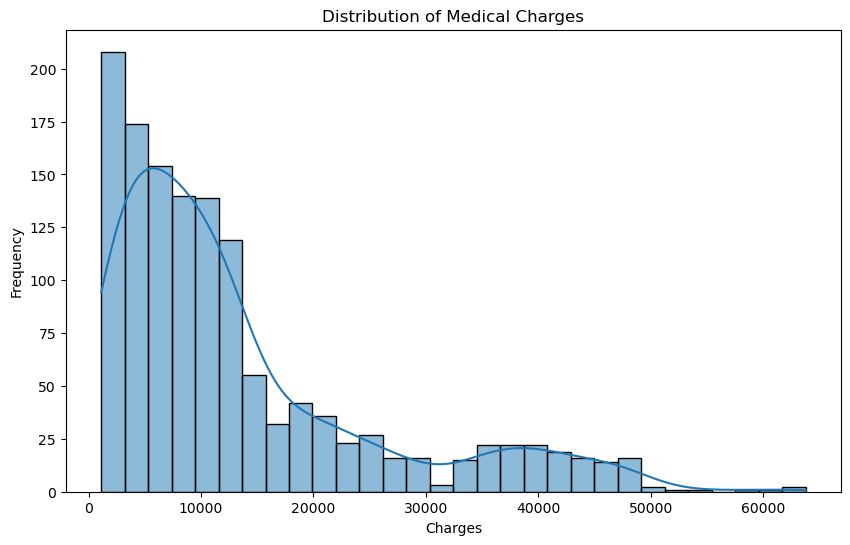

In [8]:
import seaborn as sns
# Visualize the distribution of charges
plt.figure(figsize=(10, 6))
sns.histplot(medical_price_dataset['charges'], bins=30, kde=True)
plt.title('Distribution of Medical Charges')
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.show()


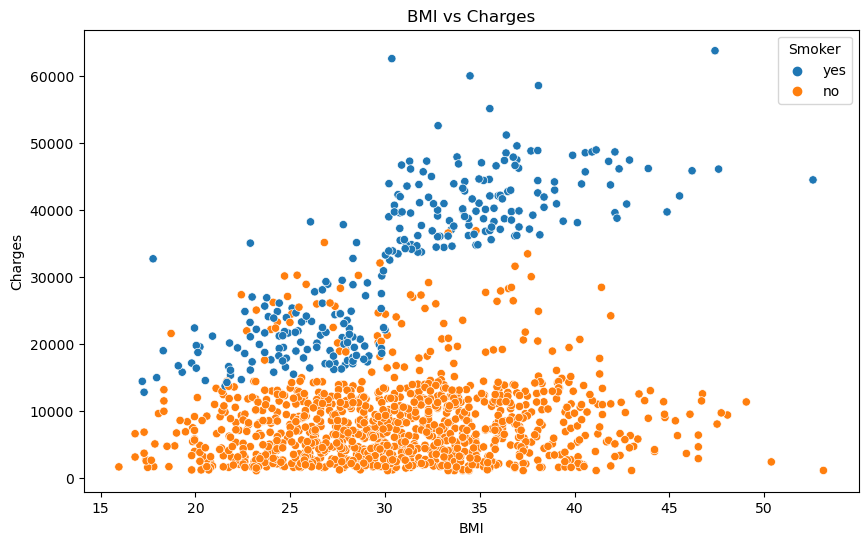

In [10]:
# Visualize the relationship between BMI and charges
plt.figure(figsize=(10, 6))
sns.scatterplot(x='bmi', y='charges', data=medical_price_dataset, hue='smoker')
plt.title('BMI vs Charges')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.legend(title='Smoker')
plt.show()


correlation matrix

The correlation matrix is a table showing correlation coefficients between variables. Each cell in the table represents the correlation between two variables. The values range from -1 to 1, where:

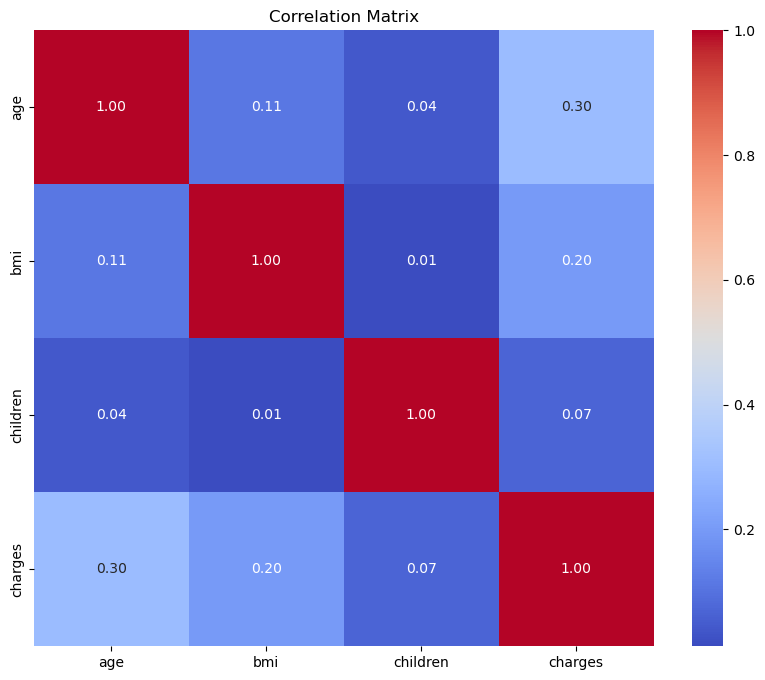

In [12]:
# Visualize the correlation matrix
correlation_matrix = medical_price_dataset.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

linear regression

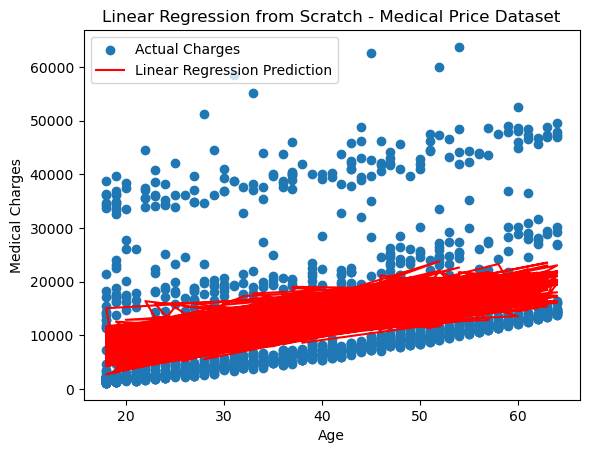

In [4]:
# Function to standardize the data
def standardize_data(X):
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    X_standardized = (X - mean) / std
    return X_standardized

# Function to add a bias term to the features
def add_bias(X):
    bias = np.ones((X.shape[0], 1))
    X_with_bias = np.concatenate((bias, X), axis=1)
    return X_with_bias

# Function to initialize weights
def initialize_weights(num_features):
    return np.zeros((num_features, 1))

# Function to perform linear regression training
def train_linear_regression(X_train, y_train, learning_rate=0.01, epochs=1000):
    num_samples, num_features = X_train.shape
    weights = initialize_weights(num_features)
    
    for epoch in range(epochs):
        # Calculate predictions
        predictions = X_train.dot(weights)
        
        # Calculate error
        error = predictions - y_train.to_numpy().reshape(-1, 1)  # Convert to NumPy array
        
        # Update weights using gradient descent
        gradient = X_train.T.dot(error) / num_samples
        weights -= learning_rate * gradient
        
    return weights


# Function to make predictions
def predict(X, weights):
    return X.dot(weights)

# Function to evaluate the mean squared error
def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred)**2)

# Extract features and target variable
X = medical_price_dataset[['age', 'bmi', 'children']]
y = medical_price_dataset['charges']

# Standardize and add bias to the features
X_standardized = standardize_data(X)
X_with_bias = add_bias(X_standardized)

# Train the linear regression model
weights = train_linear_regression(X_with_bias, y, learning_rate=0.01, epochs=1000)

# Make predictions on the training data
y_pred = predict(X_with_bias, weights)

# Visualize the results
plt.scatter(X['age'], y, label='Actual Charges')
plt.plot(X['age'], y_pred, color='red', label='Linear Regression Prediction')
plt.xlabel('Age')
plt.ylabel('Medical Charges')
plt.legend()
plt.title('Linear Regression from Scratch - Medical Price Dataset')
plt.show()


github link:
https://github.com/nidhikoria/supervised-learning-classification.git